## Table of Contents

    - 1. Importing libraries and data
    - 3. Data prep for k-means analysis
    - 4. Apply elbow technique
    - 5. K-means clustering
      - Plots for versions using two and three clusters
      - Grouping
    - 6. Discussion

### 1. Importing libraries and data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [4]:
# hides warnings from notebook 
import warnings
warnings.filterwarnings('ignore') 

In [5]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [6]:
os.environ['OMP_NUM_THREADS'] = '2' #limits memory leak issues

In [7]:
path = r'INSERT-YOUR-PATH'

In [8]:
#Importing data as df
df = pd.read_pickle(os.path.join(path, '01 Data', 'Prepared Data', 'dataset_08-23_2024-12-13.pkl'))

### 3. Data prep for k-means analysis

In [10]:
df.head()

,Country,Year,Happiness,GDP_log,Social_support,Life_expectancy,Freedom,Generosity,Corruption,Pos_affect,Neg_affect,Democracy,Inflation,_merge
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258,3.02,26.418664,both
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237,NaN,NaN,left_only
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275,2.48,2.178538,both
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267,2.48,11.804186,both
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268,2.48,6.441213,both


In [11]:
#Get names of variables
df.columns

Index(['Country', 'Year', 'Happiness', 'GDP_log', 'Social_support',
       'Life_expectancy', 'Freedom', 'Generosity', 'Corruption', 'Pos_affect',
       'Neg_affect', 'Democracy', 'Inflation', '_merge'],
      dtype='object')

In [12]:
# Create df_2 with only numerical data for the variables that seemed most promising during previous steps of the analysis.
df_2 = df[['Year', 'Happiness', 'GDP_log', 'Social_support',
       'Life_expectancy', 'Freedom', 'Generosity', 'Corruption', 'Democracy']]

In [13]:
df_2.head()

,Year,Happiness,GDP_log,Social_support,Life_expectancy,Freedom,Generosity,Corruption,Democracy
0,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,3.02
1,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,NaN
2,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,2.48
3,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,2.48
4,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,2.48


In [14]:
# Check for missing values
df_2.isnull().sum()

Year                 0
Happiness            0
GDP_log             26
Social_support      11
Life_expectancy     59
Freedom             30
Generosity          46
Corruption         113
Democracy          291
dtype: int64

In [15]:
df_2.shape

(2145, 9)

In [16]:
#Dropping NaNs
df_clean = df_2.dropna()

In [17]:
df_clean.shape

(1692, 9)

In [18]:
df_clean.head()

,Year,Happiness,GDP_log,Social_support,Life_expectancy,Freedom,Generosity,Corruption,Democracy
0,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,3.02
2,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,2.48
3,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,2.48
4,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,2.48
5,2013,3.572,7.680,0.484,52.0,0.578,0.059,0.823,2.48


### 4. Apply elbow technique

In [20]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [21]:
score = [kmeans[i].fit(df_clean).score(df_clean) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.
score

[-117714.13057269032,
 -57924.497747641566,
 -43228.16449530379,
 -34710.85141539554,
 -28715.743548374165,
 -25754.7529776449,
 -21092.01837901201,
 -19317.74545420592,
 -17488.52082725529]

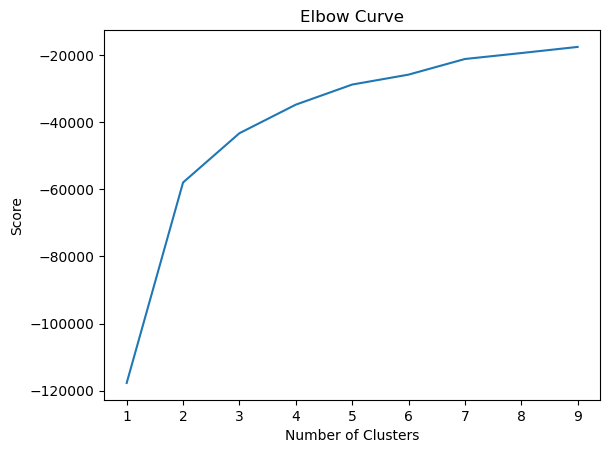

In [22]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**Observation**. Curve flattens after 2 and after 3 clusters, so I will look at both variations to see what provides the most insights.

### 5. K-means clustering

In [25]:
df_clean_2 = df_clean.copy()

In [26]:
df_clean_3 = df_clean.copy()

**For two cluster**

In [28]:
# Create the k-means object for 2 clsuters.

kmeans_2 = KMeans(n_clusters = 2) 


In [29]:
# Fit the k-means object to the data.
kmeans_2.fit(df_clean_2)

KMeans(n_clusters=2)

In [30]:
df_clean_2['Clusters'] = kmeans_2.fit_predict(df_clean_2)

In [31]:
df_clean_2.head()

,Year,Happiness,GDP_log,Social_support,Life_expectancy,Freedom,Generosity,Corruption,Democracy,Clusters
0,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,3.02,0
2,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,2.48,0
3,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,2.48,0
4,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,2.48,0
5,2013,3.572,7.680,0.484,52.0,0.578,0.059,0.823,2.48,0


In [32]:
df_clean_2['Clusters'].value_counts()

Clusters
1    1118
0     574
Name: count, dtype: int64

**For three cluster**

In [34]:
# Create the k-means object for 3 clusters.
kmeans_3 = KMeans(n_clusters = 3) 

In [35]:
# Fit the k-means object to the data.
kmeans_3.fit(df_clean_3)

KMeans(n_clusters=3)

In [36]:
df_clean_3['Clusters'] = kmeans_3.fit_predict(df_clean_3)

In [37]:
df_clean_3.head()

,Year,Happiness,GDP_log,Social_support,Life_expectancy,Freedom,Generosity,Corruption,Democracy,Clusters
0,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,3.02,1
2,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,2.48,1
3,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,2.48,1
4,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,2.48,1
5,2013,3.572,7.680,0.484,52.0,0.578,0.059,0.823,2.48,1


In [38]:
df_clean_3['Clusters'].value_counts()

Clusters
2    624
0    576
1    492
Name: count, dtype: int64

#### Plots for versions using two and three clusters

**Democracy and Happiness**

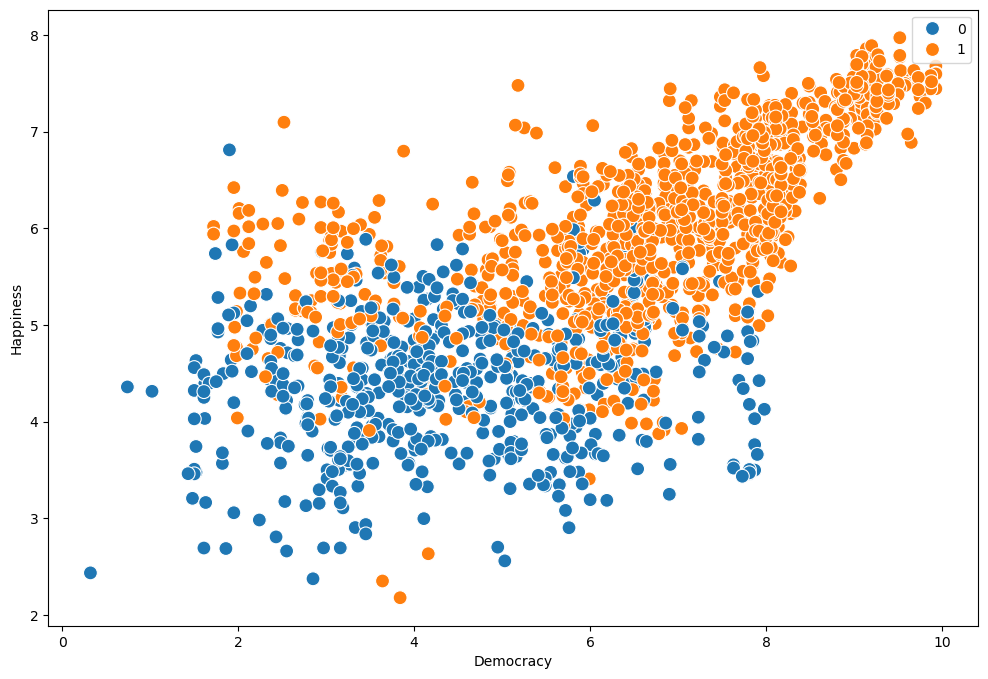

In [41]:
# 2 Clusters: Plot the clusters for the "Happiness" and "Democracy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean_2['Democracy'], y=df_clean_2['Happiness'], hue=kmeans_2.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Democracy') # Label x-axis.
plt.ylabel('Happiness') # Label y-axis.
plt.show()

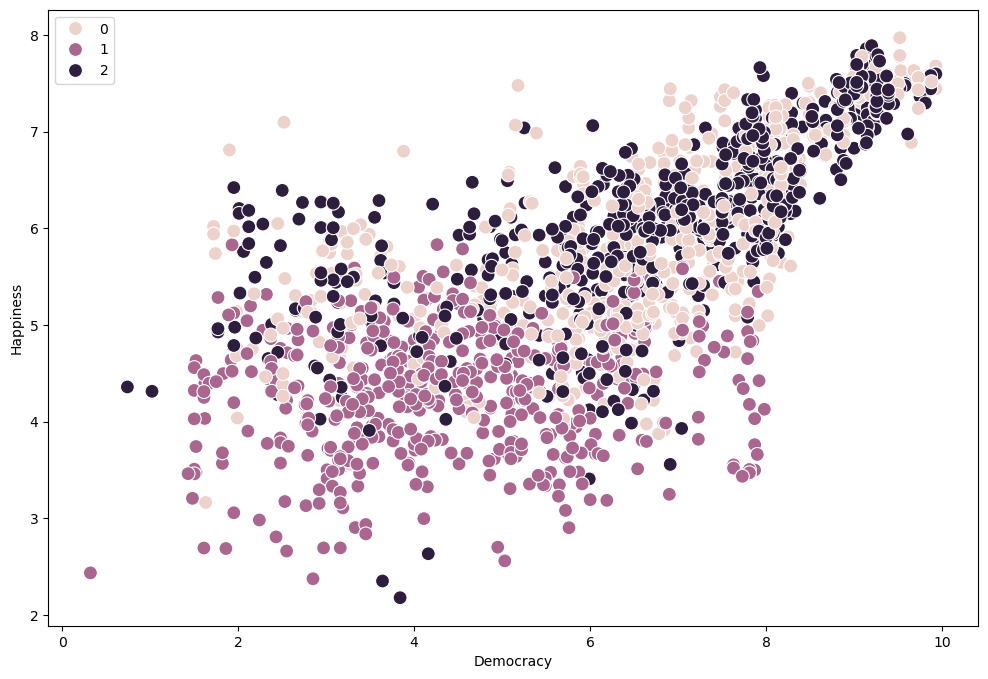

In [42]:
# 3 Clusters: Plot the clusters for the "Happiness" and "Democracy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean_3['Democracy'], y=df_clean_3['Happiness'], hue=kmeans_3.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Democracy') # Label x-axis.
plt.ylabel('Happiness') # Label y-axis.
plt.show()

**Observation** Adding the third cluster makes the visual more confusing. In the version with two clusters we can see more clearly that there appear to be similarities between data points that score high on the democracy and the happiness-scale. However, it needs to be taken into account that countries appear multiple times in the dataset (once for each year) so the grouping might be due to the same countries appearing close to each other over multiple years.

**GDP and Happiness**

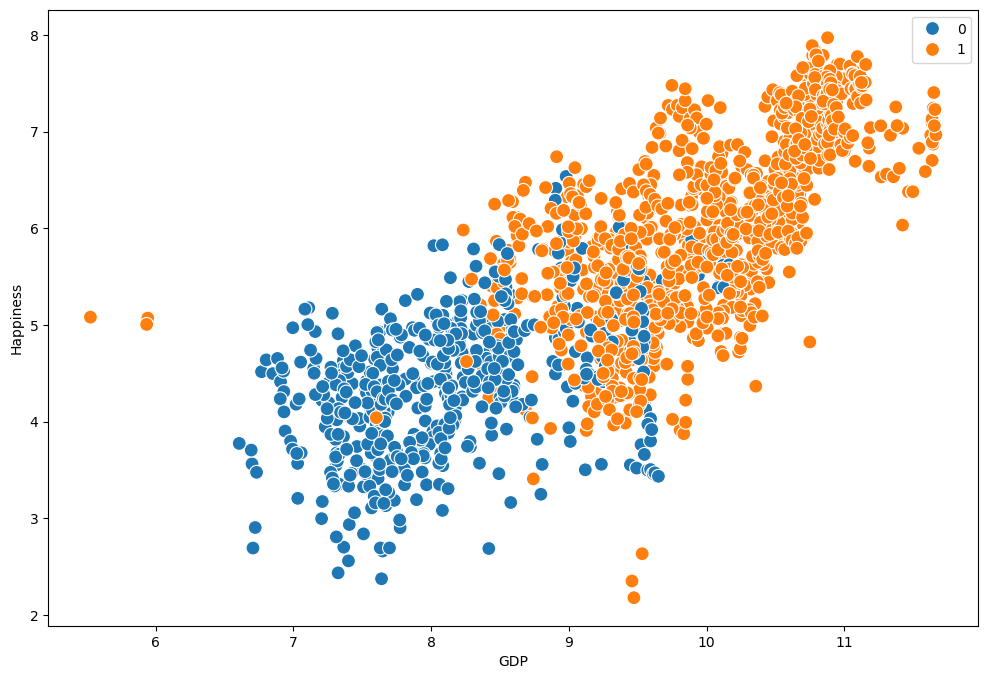

In [45]:
# 2 Clusters: Plot the clusters for the "Happiness" and "GDP_log" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean_2['GDP_log'], y=df_clean_2['Happiness'], hue=kmeans_2.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP') # Label x-axis.
plt.ylabel('Happiness') # Label y-axis.
plt.show()

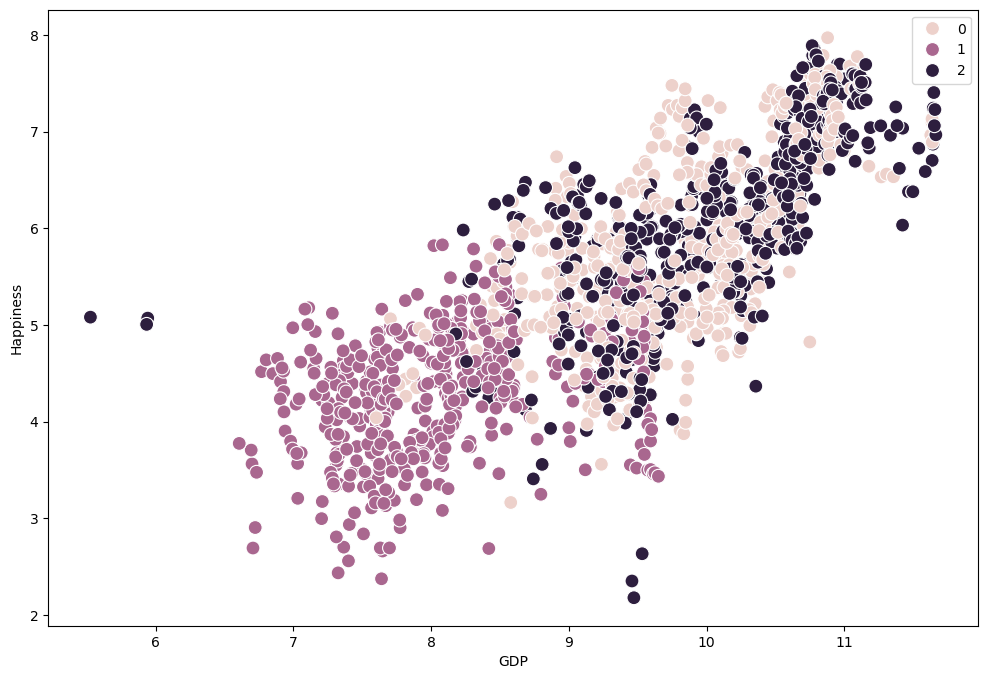

In [46]:
# 3 Clusters: Plot the clusters for the "Happiness" and "GDP_log" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean_3['GDP_log'], y=df_clean_3['Happiness'], hue=kmeans_3.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP') # Label x-axis.
plt.ylabel('Happiness') # Label y-axis.
plt.show()

**Life expectancy and Happiness**

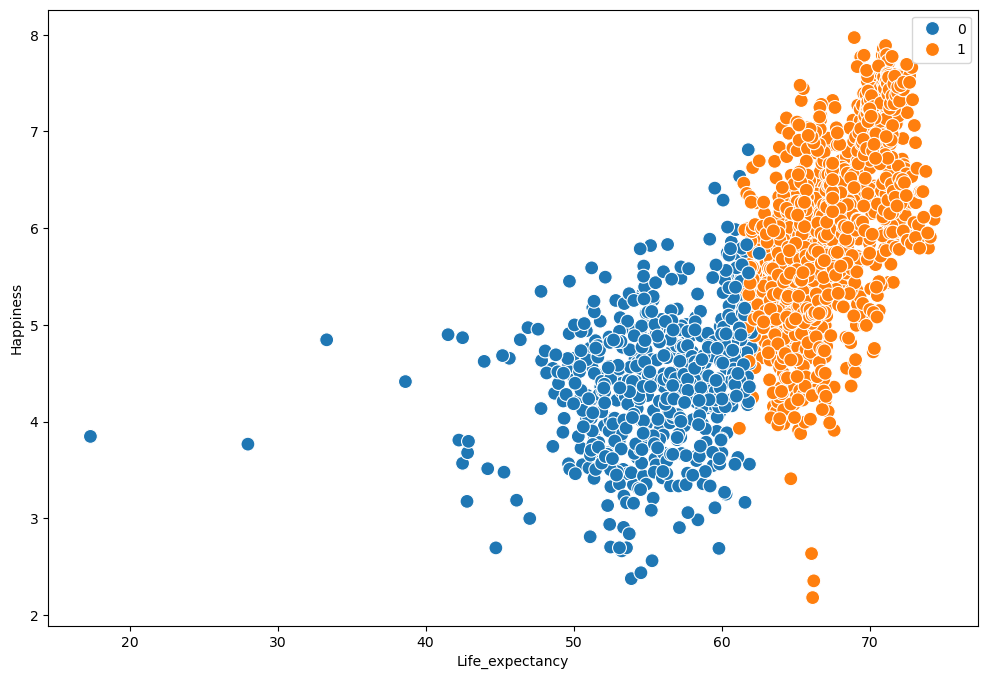

In [48]:
# 2 Clusters: Plot the clusters for the "Happiness" and "Life_expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean_2['Life_expectancy'], y=df_clean_2['Happiness'], hue=kmeans_2.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Life_expectancy') # Label x-axis.
plt.ylabel('Happiness') # Label y-axis.
plt.show()

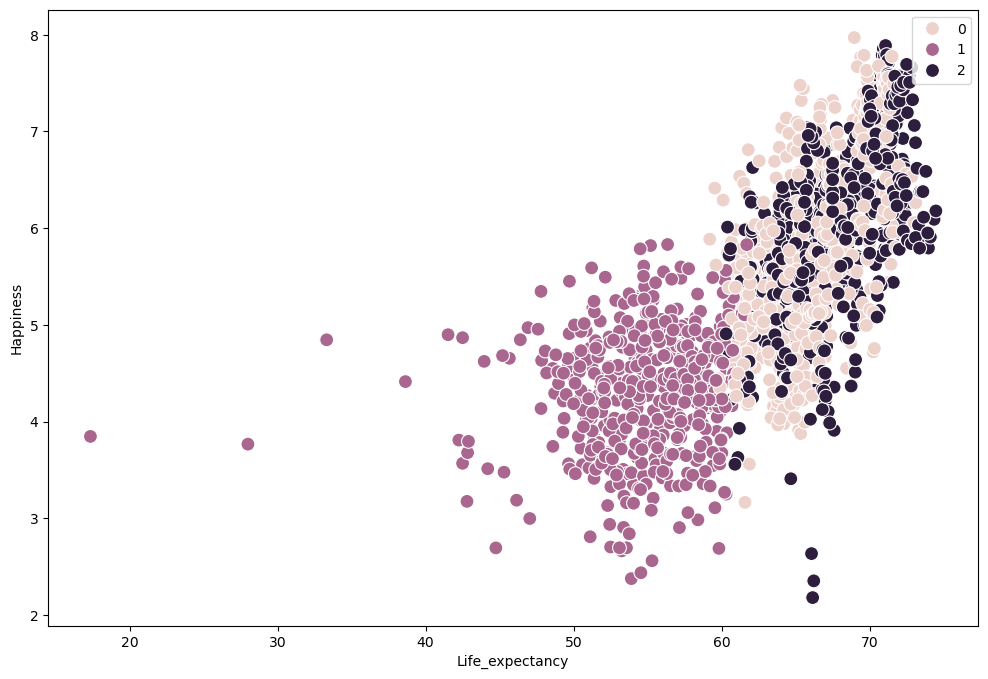

In [49]:
# 3 Clusters: the clusters for the "Happiness" and "Life_expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean_3['Life_expectancy'], y=df_clean_3['Happiness'], hue=kmeans_3.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Life_expectancy') # Label x-axis.
plt.ylabel('Happiness') # Label y-axis.
plt.show()

#### Grouping

In [51]:
# Grouping two clusters
df_clean_2.loc[df_clean_2['Clusters'] == 0, 'Cluster'] = 'Blue'
df_clean_2.loc[df_clean_2['Clusters'] == 1, 'Cluster'] = 'Yellow'

In [52]:
df_clean_2.head()

,Year,Happiness,GDP_log,Social_support,Life_expectancy,Freedom,Generosity,Corruption,Democracy,Clusters,Cluster
0,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,3.02,0,Blue
2,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,2.48,0,Blue
3,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,2.48,0,Blue
4,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,2.48,0,Blue
5,2013,3.572,7.680,0.484,52.0,0.578,0.059,0.823,2.48,0,Blue


In [53]:
#Aggregate for two clusters
df_clean_2.groupby('Cluster').agg({'Happiness':['mean', 'median'], 
                         'Democracy':['mean', 'median'], 
                         'GDP_log':['mean', 'median'],
                         'Life_expectancy':['mean', 'median']})

Happiness         Democracy           GDP_log           \
             mean  median      mean median       mean   median   
Cluster                                                          
Blue     4.400030  4.4325  4.445836  4.235   8.172500   8.0915   
Yellow   6.026635  6.0050  6.723354  6.900  10.003093  10.0830   

        Life_expectancy         
                   mean median  
Cluster                         
Blue          55.547726  55.81  
Yellow        67.612035  67.25

**Observation:** Happiness, democracy, GDP and health (i.e. life expectancy) seem to rise and fall similarly. This is not a surprise. 

In [55]:
#Grouping three clusters
df_clean_3.loc[df_clean_3['Clusters'] == 0, 'Cluster'] = 'Light pink'
df_clean_3.loc[df_clean_3['Clusters'] == 1, 'Cluster'] = 'Dark pink'
df_clean_3.loc[df_clean_3['Clusters'] == 2, 'Cluster'] = 'Purple'

In [56]:
df_clean_3.head()

,Year,Happiness,GDP_log,Social_support,Life_expectancy,Freedom,Generosity,Corruption,Democracy,Clusters,Cluster
0,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,3.02,1,Dark pink
2,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,2.48,1,Dark pink
3,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,2.48,1,Dark pink
4,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,2.48,1,Dark pink
5,2013,3.572,7.680,0.484,52.0,0.578,0.059,0.823,2.48,1,Dark pink


In [57]:
#Aggregate for three clusters
df_clean_3.groupby('Cluster').agg({'Happiness':['mean', 'median'], 
                         'Democracy':['mean', 'median'], 
                         'GDP_log':['mean', 'median'],
                         'Life_expectancy':['mean', 'median']})

Happiness         Democracy           GDP_log           \
                mean  median      mean median       mean   median   
Cluster                                                             
Dark pink   4.297020  4.3605  4.455203  4.255   8.050382   7.9965   
Light pink  5.848969  5.7745  6.433889  6.585   9.804113   9.8440   
Purple      6.058101  6.0585  6.683878  6.935  10.042494  10.1695   

           Life_expectancy           
                      mean   median  
Cluster                              
Dark pink        54.614593  55.0100  
Light pink       66.251944  66.0300  
Purple           68.017869  68.0625

**Observation:** Similarly to what we have seen in the aggregation of two clusters, the variables rise and fall together. The addition of a third cluster does not provide additional insights.

### 6. Discussion

The elbow-curve did not provide clear orientation, whether visualising two or three clusters would be more meaningful for the purpose of analysis. Having run both versions we can see that adding a third cluster to the scatterplots never added clarity and frequently made the visuals more confusing. The aggregation of means and medians of the clusters also provided no additional insights when run over three vs. two clusters. 

Overall, clustering the data with k-means as a form of unsupervised learning does not add appreciable value to the analysis. This might be in part because each country appears multiple times in the dataset (once for each year) and it can be assumed that the occurences in the scatterplot happen in close proximity to each other. I.e. groupings we perceive as sub-clusters might actually be the same countries over multiple years.

The main value that these scatterplots provide is that they show the (weak) correlation between the different variables. However, this was already explored more thoroughly in the regression analysis during supervised learning. 

Neither the visuals nor the aggregation tables show unexpected values and do not point us towards additional areas of anlysis. 

**Unsupervised learning does not appear to provide additional value to explore the relationship between happiness, income and state of regime.**

**Possible next steps**: With a larger dataset it might be worth re-running the analysis on a per-year-basis. That would control for countries occuring multiple times. However, given the comparatively small dataset that does not seem to be meaningful in this case.